# Chapter 7: Quantum Gates

Single-qubit quantum gates and operations.

---

**Prerequisites:**
- Python 3.8+
- Qiskit 2.1.2
- See `Chapter02_Software.ipynb` for installation instructions


In [2]:
# Setup and imports
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from IPython.display import display
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer

from Chapter07_QuantumGates_functions import simulateCircuit, runCircuitOnIBMQuantum, plot_measurement_results #type: ignore

print('Setup complete!')

Setup complete!


## Hadamard circuit

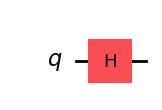

<IPython.core.display.Latex object>

In [3]:
circuit = QuantumCircuit(1) # 1 qubit
circuit.h(0) # apply H to qubit 0
display(circuit.draw('mpl'))

psi = Statevector(circuit) #extract the state
display(psi.draw('latex')) # print


## Simulating the Hadamard circuit

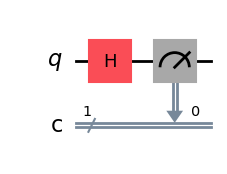

Counts: {'1': 512, '0': 488}


In [4]:
circuit = QuantumCircuit(1, 1) 
circuit.h(0) # apply H to qubit 0
# measure and place result in classical bit
circuit.measure(0, 0) 
display(circuit.draw('mpl'))
backend = Aer.get_backend('qasm_simulator')
new_circuit = transpile(circuit, backend)
job = backend.run(new_circuit,shots = 1000)
counts = job.result().get_counts(circuit)
print('Counts:',counts)

## RX Circuit

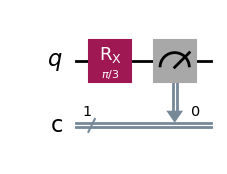

Counts: {'0': 753, '1': 271}


In [5]:
circuit = QuantumCircuit(1, 1)  
circuit.rx(np.pi/3,0) # apply Rx to qubit 0
circuit.measure(0, 0) 
display(circuit.draw('mpl')) 
counts = simulateCircuit(circuit,shots=1024)
print('Counts:',counts)

## Operators X and H in sequence

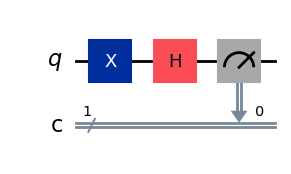

Counts: {'0': 502, '1': 498}


In [6]:
circuit = QuantumCircuit(1, 1)  
circuit.x(0) 
circuit.h(0) 
circuit.measure(0, 0) 
display(circuit.draw('mpl'))
counts = simulateCircuit(circuit,1000)
print('Counts:',counts)

## State preparation

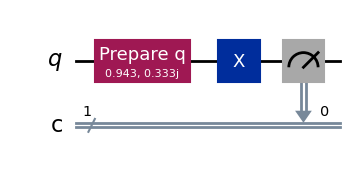

Counts: {'1': 875, '0': 125}


In [7]:
circuit = QuantumCircuit(1, 1)  
q = Statevector([np.sqrt(8)/3, (1j)/3]) 
circuit.prepare_state(q,0,'Prepare q')
circuit.x(0) 
circuit.measure(0, 0) 
display(circuit.draw('mpl'))
counts = simulateCircuit(circuit,1000)
print('Counts:',counts)
